<a href="https://colab.research.google.com/github/Achieng45/Machine-Learning/blob/main/Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [261]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [262]:
data=pd.read_csv('modified_data(1).csv')
df=pd.DataFrame(data)
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [263]:
data.shape

(1460, 77)

In [264]:
data.drop('Id', axis=1, inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Check coluns with missing data

In [265]:
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

Fill in missing values

In [266]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
data.LotFrontage=imputer.fit_transform(data['LotFrontage'].values.reshape(-1,1))[:,0]
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [267]:
initialFeatures=list(data.columns)
initialFeatures
len(initialFeatures)

76

In [268]:
features_missing_data = list(data.columns[data.isna().any()])
len(features_missing_data)

14

In [269]:
data.dropna(axis=1, thresh=0.5 * (len(data)), inplace=True)

In [270]:
mean_fill=['LotFrontage', 'MasVnrArea']
backward_fill_data = ['FireplaceQu']
forward_fill_data = list(set(features_missing_data)-set(mean_fill)-set(backward_fill_data))

In [271]:
for a in mean_fill:
  data[a].fillna(data[a].mean(),inplace=True)
for b in backward_fill_data:
  data[b].fillna(method='bfill',inplace=True)
for c in forward_fill_data:
  data[c].fillna(method='ffill',inplace=True)

In [272]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [273]:
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

In [274]:
categoricalFeatures = list(data.select_dtypes(include=['object']).copy().columns)
categoricalFeatures

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [275]:
nominalData=['MSZoning', 'LandContour', 'LotConfig','Neighborhood','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','BsmtFinType1','CentralAir']
ordinalData = list(set(categoricalFeatures)-set(nominalData))
numericalData = list(set(initialFeatures)-set(categoricalFeatures))
target = ['SalePrice']
data[numericalData]

,OverallCond,MSSubClass,GarageCars,EnclosedPorch,LotArea,YearBuilt,TotalBsmtSF,WoodDeckSF,GarageArea,FullBath,...,2ndFlrSF,GarageYrBlt,BsmtUnfSF,TotRmsAbvGrd,BsmtFullBath,PoolArea,MoSold,YearRemodAdd,LotFrontage,OpenPorchSF
0,5,60,2,0,8450,2003,856,0,548,2,...,854,2003.0,150,8,1,0,2,2003,65.0,61
1,8,20,2,0,9600,1976,1262,298,460,2,...,0,1976.0,284,6,0,0,5,1976,80.0,0
2,5,60,2,0,11250,2001,920,0,608,2,...,866,2001.0,434,6,1,0,9,2002,68.0,42
3,5,70,3,272,9550,1915,756,0,642,1,...,756,1998.0,540,7,1,0,2,1970,60.0,35
4,5,60,3,0,14260,2000,1145,192,836,2,...,1053,2000.0,490,9,1,0,12,2000,84.0,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,60,2,0,7917,1999,953,0,460,2,...,694,1999.0,953,7,0,0,8,2000,62.0,40
1456,6,20,2,0,13175,1978,1542,349,500,2,...,0,1978.0,589,7,1,0,2,1988,85.0,0
1457,9,70,1,0,9042,1941,1152,0,252,2,...,1152,1941.0,877,9,0,0,5,2006,66.0,60
1458,6,20,1,112,9717,1950,1078,366,240,1,...,0,1950.0,0,5,1,0,4,1996,68.0,0


Encode orninal data

In [276]:
for feature in ordinalData:
 
  data[feature]=(data[feature].astype('category')).cat.codes
df_ordinal = data[ordinalData]

One hot encoding for norminal data

In [277]:
df_nominal = pd.get_dummies(data[nominalData])

No processing for numerical data

In [278]:
df_numerical = data[numericalData]

In [279]:
joinedData = pd.concat([df_numerical, df_nominal, df_ordinal], axis=1)
joinedData

,OverallCond,MSSubClass,GarageCars,EnclosedPorch,LotArea,YearBuilt,TotalBsmtSF,WoodDeckSF,GarageArea,FullBath,...,SaleType,Condition1,Electrical,BsmtQual,BsmtCond,Condition2,HeatingQC,GarageFinish,FireplaceQu,PavedDrive
0,5,60,2,0,8450,2003,856,0,548,2,...,8,2,4,2,3,2,0,1,4,2
1,8,20,2,0,9600,1976,1262,298,460,2,...,8,1,4,2,3,2,0,1,4,2
2,5,60,2,0,11250,2001,920,0,608,2,...,8,2,4,2,3,2,0,1,4,2
3,5,70,3,272,9550,1915,756,0,642,1,...,8,2,4,3,1,2,2,2,2,2
4,5,60,3,0,14260,2000,1145,192,836,2,...,8,2,4,2,3,2,0,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,60,2,0,7917,1999,953,0,460,2,...,8,2,4,2,3,2,0,1,4,2
1456,6,20,2,0,13175,1978,1542,349,500,2,...,8,2,4,2,3,2,4,2,4,2
1457,9,70,1,0,9042,1941,1152,0,252,2,...,8,2,4,3,1,2,0,1,2,2
1458,6,20,1,112,9717,1950,1078,366,240,1,...,8,2,0,3,3,2,2,2,-1,2


Standardize the encoded data

In [280]:
scaler = StandardScaler()
df_X = joinedData.drop('SalePrice', axis=1)
X = np.array(df_X)
df_X

,OverallCond,MSSubClass,GarageCars,EnclosedPorch,LotArea,YearBuilt,TotalBsmtSF,WoodDeckSF,GarageArea,FullBath,...,SaleType,Condition1,Electrical,BsmtQual,BsmtCond,Condition2,HeatingQC,GarageFinish,FireplaceQu,PavedDrive
0,5,60,2,0,8450,2003,856,0,548,2,...,8,2,4,2,3,2,0,1,4,2
1,8,20,2,0,9600,1976,1262,298,460,2,...,8,1,4,2,3,2,0,1,4,2
2,5,60,2,0,11250,2001,920,0,608,2,...,8,2,4,2,3,2,0,1,4,2
3,5,70,3,272,9550,1915,756,0,642,1,...,8,2,4,3,1,2,2,2,2,2
4,5,60,3,0,14260,2000,1145,192,836,2,...,8,2,4,2,3,2,0,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,60,2,0,7917,1999,953,0,460,2,...,8,2,4,2,3,2,0,1,4,2
1456,6,20,2,0,13175,1978,1542,349,500,2,...,8,2,4,2,3,2,4,2,4,2
1457,9,70,1,0,9042,1941,1152,0,252,2,...,8,2,4,3,1,2,0,1,2,2
1458,6,20,1,112,9717,1950,1078,366,240,1,...,8,2,0,3,3,2,2,2,-1,2


In [281]:
df_y = data[target]
y = np.array(df_y)
df_y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [282]:
X=scaler.fit_transform(X)
y=scaler.fit_transform(y)

Print regressor cooefficient

In [283]:
regressor = LassoCV()
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

In [284]:
coef_col = pd.Series(regressor.coef_,index=df_X.columns)

L1 selected only  77  features out of  162  from the transformed dataset 


Text(0.5, 1.0, 'Feature Selection Using L1 Embedder')

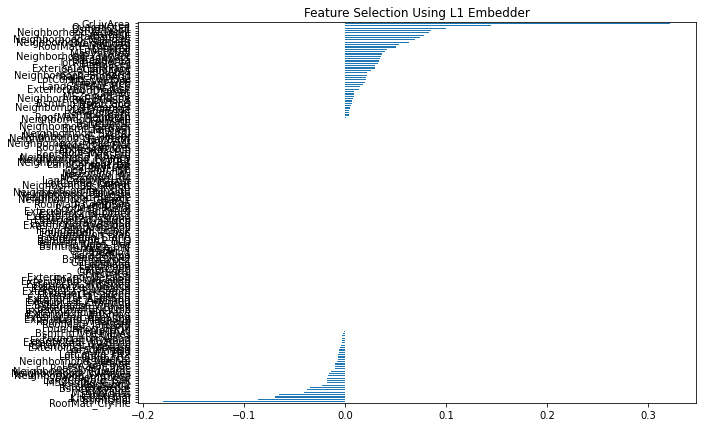

In [285]:
sorted_coef = coef_col.sort_values()
plt.rcParams['figure.figsize']=(10.0,7.0)
sorted_coef.plot(kind="barh")

no_of_selected_features = sum(coef_col != 0)
no_of_rejected_features = sum(coef_col == 0)
total_features = no_of_selected_features + no_of_rejected_features
print("L1 selected only ",no_of_selected_features," features out of ",total_features," from the transformed dataset ")
plt.title("Feature Selection Using L1 Embedder")

In [286]:
selected_features_list = []
for label, value in zip(coef_col.index, coef_col.values):
    if value != 0:
        selected_features_list.append(label)

selected_features_list

['OverallCond',
 'MSSubClass',
 'GarageCars',
 'LotArea',
 'YearBuilt',
 'TotalBsmtSF',
 'WoodDeckSF',
 'GarageArea',
 'FullBath',
 'LowQualFinSF',
 'KitchenAbvGr',
 'OverallQual',
 'ScreenPorch',
 'YrSold',
 'MasVnrArea',
 'BedroomAbvGr',
 'GrLivArea',
 'Fireplaces',
 'BsmtFinSF2',
 'BsmtFinSF1',
 'TotRmsAbvGrd',
 'BsmtFullBath',
 'PoolArea',
 'MoSold',
 'YearRemodAdd',
 'LotFrontage',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'RoofStyle_Gable',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkFace',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',


In [287]:
df_standardized = pd.DataFrame(X, columns=df_X.columns)
X = df_standardized[selected_features_list]
X

,OverallCond,MSSubClass,GarageCars,LotArea,YearBuilt,TotalBsmtSF,WoodDeckSF,GarageArea,FullBath,LowQualFinSF,...,ExterQual,KitchenQual,MasVnrType,SaleType,BsmtQual,BsmtCond,Condition2,HeatingQC,GarageFinish,FireplaceQu
0,-0.517200,0.073375,0.311725,-0.207142,1.050994,-0.459303,-0.752176,0.351000,0.789741,-0.120242,...,-0.777976,-0.409369,-1.236344,0.313867,-0.299527,0.286468,-0.03174,-0.884658,-0.227521,1.115711
1,2.179628,-0.872563,0.311725,-0.091886,0.156734,0.466465,1.626195,-0.060731,0.789741,-0.120242,...,0.663451,0.795629,0.389838,0.313867,-0.299527,0.286468,-0.03174,-0.884658,-0.227521,1.115711
2,-0.517200,0.073375,0.311725,0.073480,0.984752,-0.313369,-0.752176,0.631726,0.789741,-0.120242,...,-0.777976,-0.409369,-1.236344,0.313867,-0.299527,0.286468,-0.03174,-0.884658,-0.227521,1.115711
3,-0.517200,0.309859,1.650307,-0.096897,-1.863632,-0.687324,-0.752176,0.790804,-1.026041,-0.120242,...,0.663451,-0.409369,0.389838,0.313867,0.854323,-2.711695,-0.03174,0.265476,1.007349,-0.628334
4,-0.517200,0.073375,1.650307,0.375148,0.951632,0.199680,0.780197,1.698485,0.789741,-0.120242,...,-0.777976,-0.409369,-1.236344,0.313867,-0.299527,0.286468,-0.03174,-0.884658,-0.227521,1.115711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.517200,0.073375,0.311725,-0.260560,0.918511,-0.238122,-0.752176,-0.060731,0.789741,-0.120242,...,0.663451,0.795629,0.389838,0.313867,-0.299527,0.286468,-0.03174,-0.884658,-0.227521,1.115711
1456,0.381743,-0.872563,0.311725,0.266407,0.222975,1.104925,2.033231,0.126420,0.789741,-0.120242,...,0.663451,0.795629,2.016020,0.313867,-0.299527,0.286468,-0.03174,1.415610,1.007349,1.115711
1457,3.078570,0.309859,-1.026858,-0.147810,-1.002492,0.215641,-0.752176,-1.033914,0.789741,-0.120242,...,-3.660830,-0.409369,0.389838,0.313867,0.854323,-2.711695,-0.03174,-0.884658,-0.227521,-0.628334
1458,0.381743,-0.872563,-1.026858,-0.080160,-0.704406,0.046905,2.168910,-1.090059,-1.026041,-0.120242,...,0.663451,-0.409369,0.389838,0.313867,0.854323,0.286468,-0.03174,0.265476,1.007349,-3.244401


Feature extracton using PCA

In [288]:
svd=TruncatedSVD(n_components=50)
p_components=svd.fit_transform(X)
svd.explained_variance_ratio_

array([0.1138924 , 0.04635534, 0.03792224, 0.03112819, 0.02694934,
       0.02313668, 0.0227184 , 0.02100618, 0.0195951 , 0.0189368 ,
       0.01860719, 0.01842406, 0.01751098, 0.01731525, 0.01699965,
       0.01638329, 0.01610018, 0.01596544, 0.01520284, 0.01497535,
       0.01489295, 0.01460966, 0.01419592, 0.01391352, 0.0137144 ,
       0.01358236, 0.01341216, 0.01297443, 0.01291204, 0.01272579,
       0.01239344, 0.01226813, 0.01205909, 0.0117857 , 0.01134066,
       0.01124892, 0.01096273, 0.01074302, 0.01062171, 0.01053483,
       0.01017134, 0.01000249, 0.00982526, 0.00956827, 0.00916637,
       0.00912355, 0.00899414, 0.00884479, 0.0088053 , 0.00832218])

In [289]:
pcaNewData = pd.DataFrame(p_components)
targetNewData = pd.DataFrame(y,columns=['SalePrice'])
finalNewData = pd.concat([pcaNewData,targetNewData],axis=1)
finalNewData

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,SalePrice
0,1.892469,-0.786976,-0.101047,-0.736602,-0.639894,-0.780293,0.877874,-0.653861,-0.246141,0.401302,...,0.061945,-0.495511,0.639979,-0.052687,0.766762,-0.466084,-0.271472,0.372407,-0.172201,0.347273
1,0.452093,0.206000,1.654033,0.242091,-0.324543,0.288262,-3.171087,-2.592388,-0.617068,-1.414983,...,-0.114965,-0.102741,-1.672326,0.131421,-0.692294,-1.174775,0.354673,1.438410,-0.660761,0.007288
2,2.100255,-0.700055,0.210735,-0.457920,-0.568624,-0.764349,0.183790,-0.449080,-0.017907,-0.058532,...,-0.512192,-0.635126,0.469408,0.254664,-0.287953,-0.714013,-0.242014,-0.158599,0.003681,0.536154
3,-1.839264,1.699222,-1.778924,1.882410,2.073557,-0.896237,-0.473605,-0.673561,1.797097,-0.509020,...,-0.552446,-1.334799,-0.268039,0.558625,1.148931,-0.235569,-0.939344,-0.473781,-0.471150,-0.515281
4,4.897355,1.226442,0.077283,-1.919549,-0.926215,-2.224638,1.060957,-1.275834,0.421064,0.628062,...,-0.773024,-0.038142,0.243303,0.728057,-1.745203,0.289526,-0.769087,-1.738080,0.668775,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.067359,-0.353355,-1.246829,-0.805080,-1.257622,-0.061948,-0.416260,-0.074959,-0.804076,-0.339065,...,-0.043699,-0.152001,0.056888,0.564054,0.319580,0.396996,-0.230725,0.202298,-0.125973,-0.074560
1456,0.671241,2.816651,1.720497,-1.799956,0.447918,1.885468,-1.561119,-1.313170,-1.010969,-0.349659,...,-0.992081,0.637016,0.022887,-0.453316,0.131884,0.450796,-0.407404,-0.015090,-0.253006,0.366161
1457,1.260861,1.680482,-2.832188,1.533481,0.678131,-1.118259,-1.535220,-1.872076,0.066237,-0.051813,...,-0.161068,-2.072425,-0.551702,-0.602779,0.842546,-0.200288,-1.556780,0.080324,1.459517,1.077611
1458,-1.513557,-0.381529,2.616971,2.182337,0.257022,1.039861,-1.407869,0.318348,-1.116135,1.533319,...,-0.495973,-1.044952,0.752664,-0.628659,0.236343,0.885247,1.321313,-0.975983,0.074494,-0.488523


In [290]:
XPCA=p_components
XPCA

array([[ 1.89246875, -0.78697551, -0.10104737, ..., -0.27147207,
         0.37240719, -0.17220063],
       [ 0.45209312,  0.20600038,  1.6540328 , ...,  0.35467342,
         1.43841024, -0.66076121],
       [ 2.10025453, -0.70005494,  0.21073471, ..., -0.24201368,
        -0.15859949,  0.00368102],
       ...,
       [ 1.26086103,  1.68048231, -2.83218769, ..., -1.55678045,
         0.08032401,  1.45951697],
       [-1.51355666, -0.38152911,  2.61697124, ...,  1.32131299,
        -0.97598325,  0.07449405],
       [-0.98856554,  0.41792381,  2.41544272, ...,  1.09983597,
         1.0485895 , -0.46637596]])

In [291]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

split data

In [292]:
y = pd.DataFrame(y, columns = df_y.columns)
y

,SalePrice
0,0.347273
1,0.007288
2,0.536154
3,-0.515281
4,0.869843
...,...
1455,-0.074560
1456,0.366161
1457,1.077611
1458,-0.488523


In [293]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Train regression model

In [294]:
regressor=LassoCV()
regressor.fit(XPCA,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

In [295]:
regressor.coef_

array([ 2.94655405e-01,  8.78503974e-02, -3.13102060e-02,  4.44475560e-02,
        2.46131842e-03, -4.05152352e-02, -9.29009111e-02, -3.41837043e-02,
        5.65032504e-02,  6.15943681e-03,  5.17554694e-02, -7.05842279e-03,
       -2.65155448e-03,  4.17804015e-03, -9.36094965e-04, -0.00000000e+00,
        1.94606663e-02, -3.25374223e-02,  1.99765018e-04,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -2.37960881e-02, -6.52984569e-03,
       -3.15803050e-02,  1.28880690e-02, -0.00000000e+00,  0.00000000e+00,
       -3.78054928e-02,  0.00000000e+00,  4.52529352e-02,  0.00000000e+00,
       -7.88794391e-03, -1.77994375e-02, -3.82057633e-02, -0.00000000e+00,
       -3.87646015e-02, -4.49553035e-02,  9.45351365e-03,  1.21960457e-02,
       -8.53499209e-03,  8.99981461e-02,  2.08927120e-02, -1.50863585e-02,
        0.00000000e+00,  4.52546921e-02, -1.76326260e-02, -4.59820959e-02,
       -9.94739129e-03,  2.36284329e-02])

In [296]:
regressor.intercept_

6.611400977805686e-16

In [297]:
model = Sequential()

In [298]:
# input layer
model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1, activation = 'sigmoid'))

# compile model
model.compile(loss='mse', optimizer='adam')

model.fit(X_train, y_train,
         validation_data=(X_test, y_test),
         epochs = 100,
         batch_size=256
         )

Epoch 1/100
5/5 [==============================] - 1s 43ms/step - loss: 1.1550 - val_loss: 1.3553
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 0.9950 - val_loss: 1.1963
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 0.8739 - val_loss: 1.0846
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 0.7886 - val_loss: 1.0090
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 0.7227 - val_loss: 0.9530
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 0.6910 - val_loss: 0.9107
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 0.6499 - val_loss: 0.8807
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 0.6208 - val_loss: 0.8597
Epoch 9/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6182 - val_loss: 0.8459
Epoch 10/100
5/5 [==============================] - 0s 12ms/step - loss: 0.5883 - val_loss: 0.8366
Epoch 11/100
5/5 [==

In [299]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,1.155033,1.355304
1,0.995017,1.196267
2,0.873946,1.084646
3,0.788576,1.008993
4,0.722695,0.952952
...,...,...
95,0.512205,0.808182
96,0.511361,0.808151
97,0.512497,0.808126
98,0.512571,0.808147


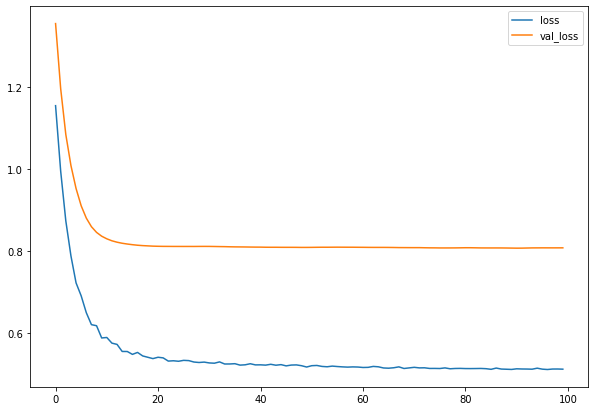

In [300]:
losses.plot()

In [301]:
y_hat = model.predict(X_test)

In [302]:
%matplotlib inline
mean_absolute_error(y_test,y_hat)

0.6075002401023806

In [303]:
mean_squared_error(y_test, y_hat)

0.8081896031296604

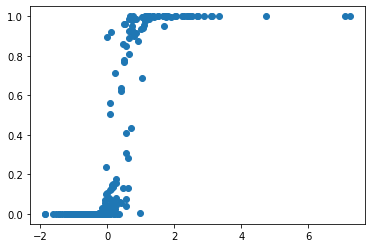

In [304]:
plt.scatter(y_test, y_hat)